## FERPlus-CNN – Facial Emotion Recognition Web App

### Loading FERPlus Dataset

In [1]:
train_dir = '/Users/sruthiganji/Documents/GitHub/DMT_Class/Group_project/archive (1)/train'
val_dir   = '/Users/sruthiganji/Documents/GitHub/DMT_Class/Group_project/archive (1)/validation'
test_dir  = '/Users/sruthiganji/Documents/GitHub/DMT_Class/Group_project/archive (1)/test'

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (112, 112)
BATCH_SIZE = 32
COLOR_MODE = "grayscale"
CLASS_MODE = "categorical"


train_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_gen   = ImageDataGenerator(rescale=1.0/255)
test_gen  = ImageDataGenerator(rescale=1.0/255)

def build_loader(gen, folder, shuffle=True):
    return gen.flow_from_directory(
        folder,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        color_mode=COLOR_MODE,
        class_mode=CLASS_MODE,
        shuffle=shuffle
    )

train_ds = build_loader(train_gen, train_dir, shuffle=True)
val_ds   = build_loader(val_gen, val_dir, shuffle=True)
test_ds  = build_loader(test_gen, test_dir, shuffle=False)


Found 66379 images belonging to 8 classes.
Found 8341 images belonging to 8 classes.
Found 3573 images belonging to 8 classes.


In [3]:
class_names = list(train_ds.class_indices.keys())
class_names

['angry', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'suprise']

### Model Architecture

In [4]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense

In [5]:
no_of_classes = len(class_names)
input_shape = (112, 112, 1)


In [10]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=1e-4)


In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(no_of_classes, activation='softmax')
])



In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,879,498 (26.24 MB)

 Trainable params: 6,878,536 (26.24 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:

model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

ckpt = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=35,
    callbacks=[es, ckpt]
)


Epoch 1/35
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1737 - loss: 21.6462

2075/2075 ━━━━━━━━━━━━━━━━━━━━ 88s 41ms/step - accuracy: 0.1927 - loss: 25.7311 - val_accuracy: 0.3944 - val_loss: 8.5288
Epoch 2/35
2074/2075 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2672 - loss: 27.4938

2075/2075 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.2984 - loss: 24.8635 - val_accuracy: 0.5185 - val_loss: 8.1613
Epoch 3/35
2074/2075 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3687 - loss: 17.4841

2075/2075 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.3898 - loss: 15.6072 - val_accuracy: 0.5912 - val_loss: 5.7972
Epoch 4/35
2074/2075 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4492 - loss: 11.0818

2075/2075 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.4603 - loss: 10.0115 - val_accuracy: 0.6028 - val_loss: 5.0521
Epoch 5/35
2074/2075 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4948 - loss: 7.0346

2075/2075 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5002 - loss: 6.3210 - val_accuracy: 0.6227 - val_loss: 2.9540
Epoch 6/35
2074/2075 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5279 - loss: 4.1199

2075/2075 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5338 - loss: 3.5220 - val_accuracy: 0.6074 - val_loss: 1.8466
Epoch 7/35
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5597 - loss: 2.0626

2075/2075 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5753 - loss: 1.7543 - val_accuracy: 0.6354 - val_loss: 1.1437
Epoch 8/35
2074/2075 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6283 - loss: 1.1582

2075/2075 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.6393 - loss: 1.0767 - val_accuracy: 0.6629 - val_loss: 0.9872
Epoch 9/35
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6858 - loss: 0.8913 - val_accuracy: 0.6479 - val_loss: 1.0540
Epoch 10/35
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7080 - loss: 0.8273

2075/2075 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7150 - loss: 0.8068 - val_accuracy: 0.6746 - val_loss: 0.9835
Epoch 11/35
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7348 - loss: 0.7548 - val_accuracy: 0.6788 - val_loss: 1.0529
Epoch 12/35
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7506 - loss: 0.7107 - val_accuracy: 0.6530 - val_loss: 1.2419
Epoch 13/35
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7651 - loss: 0.6708 - val_accuracy: 0.6937 - val_loss: 0.9942
Epoch 14/35
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7735 - loss: 0.6505 - val_accuracy: 0.6779 - val_loss: 1.0476
Epoch 15/35
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7802 - loss: 0.6340 - val_accuracy: 0.6861 - val_loss: 1.1451
Epoch 16/35
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7873 - loss: 0.6185 - val_accuracy: 0.6979 - val_loss: 1.0754


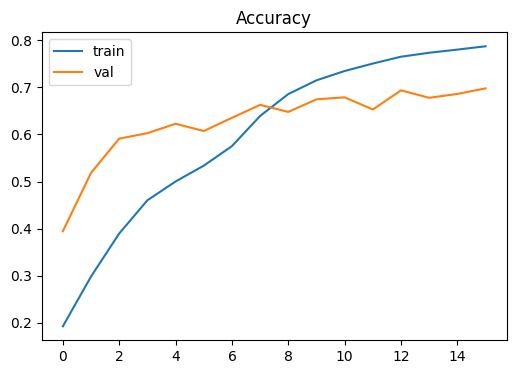

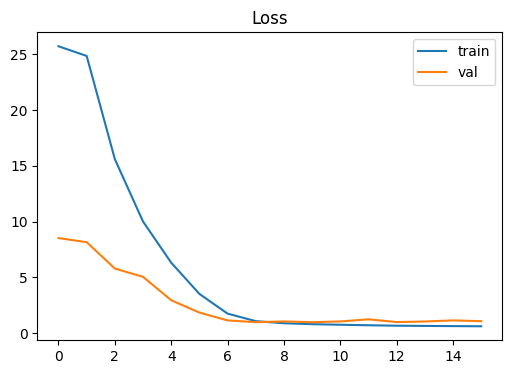

112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


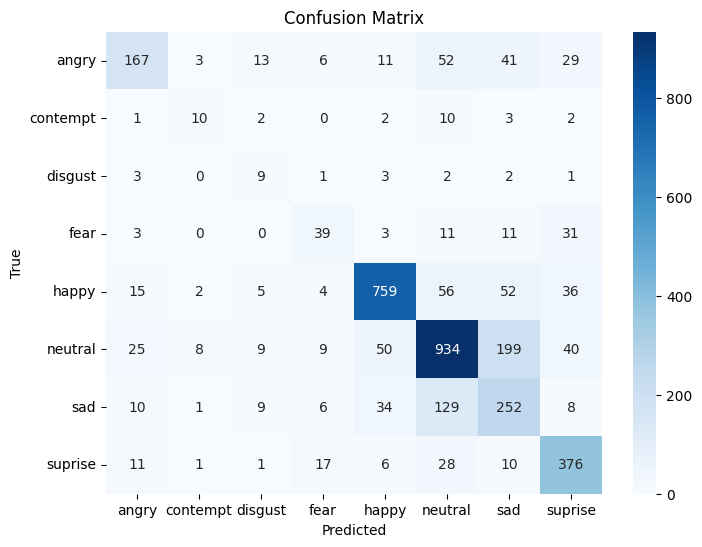

              precision    recall  f1-score   support

       angry       0.71      0.52      0.60       322
    contempt       0.40      0.33      0.36        30
     disgust       0.19      0.43      0.26        21
        fear       0.48      0.40      0.43        98
       happy       0.87      0.82      0.84       929
     neutral       0.76      0.73      0.75      1274
         sad       0.44      0.56      0.49       449
     suprise       0.72      0.84      0.77       450

    accuracy                           0.71      3573
   macro avg       0.57      0.58      0.56      3573
weighted avg       0.73      0.71      0.72      3573



In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# --- Curves ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(6,4))
plt.plot(acc, label='train')
plt.plot(val_acc, label='val')
plt.title("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(loss, label='train')
plt.plot(val_loss, label='val')
plt.title("Loss")
plt.legend()
plt.show()

# --- Predictions ---
test_steps = test_ds.samples // test_ds.batch_size + 1
pred_probs = model.predict(test_ds, steps=test_steps)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = test_ds.classes

# --- Confusion Matrix ---
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# --- Precision / Recall / F1 ---
print(classification_report(true_labels, pred_labels, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


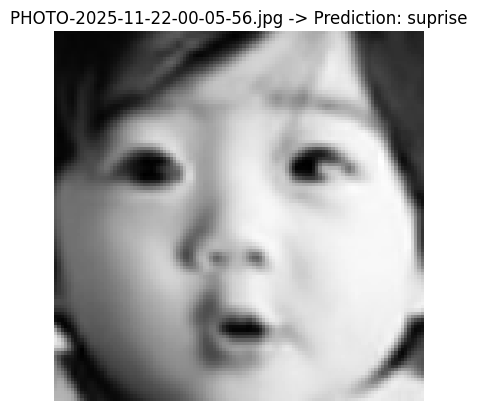

No face detected in PHOTO-2025-11-22-00-07-46.jpg
No face detected in PHOTO-2025-11-22-00-07-21.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


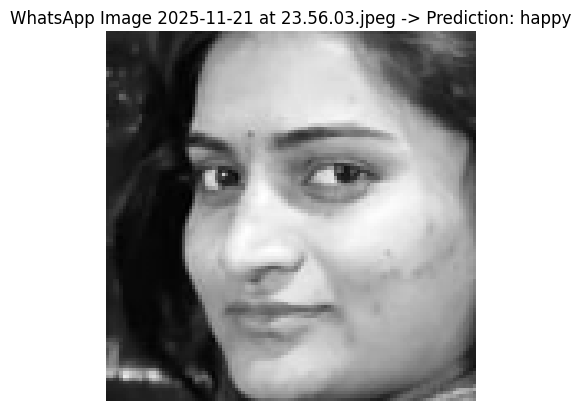

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


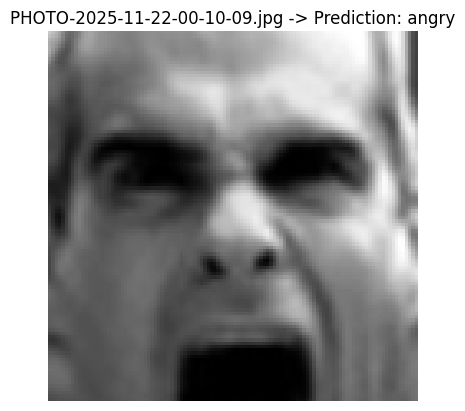

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


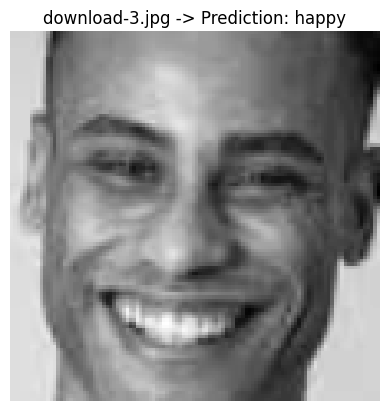

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


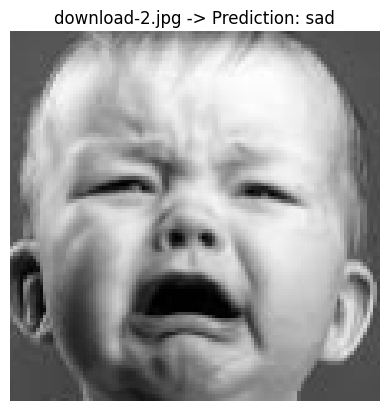

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


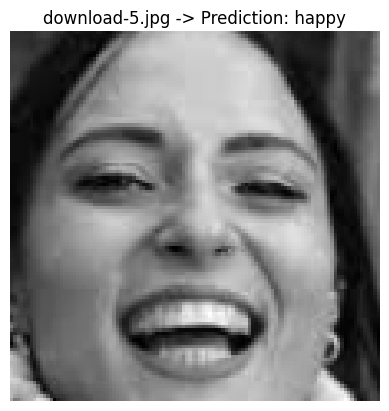

In [38]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Paths
test_folder = "/Users/sruthiganji/Documents/GitHub/DMT_Class/Group_project/live_test"
model_path = "best_model.h5"

# Load model
model = load_model(model_path)
class_names = class_names  # or class_names from training

IMG_SIZE = (112, 112)

# Load face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Loop through all images
for img_file in os.listdir(test_folder):
    if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue
    img_path = os.path.join(test_folder, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print(f"No face detected in {img_file}")
        continue

    for (x, y, w, h) in faces:
        face_img = img[y:y+h, x:x+w]
        face_resized = cv2.resize(face_img, IMG_SIZE)
        face_input = face_resized.astype("float32") / 255.0
        face_input = np.expand_dims(face_input, axis=(0, -1))

        pred = model.predict(face_input)
        pred_class = class_names[np.argmax(pred)]

        plt.imshow(face_resized, cmap='gray')
        plt.title(f"{img_file} -> Prediction: {pred_class}")
        plt.axis('off')
        plt.show()


In [41]:
labels = list(train_ds.class_indices.keys())
np.save("labels.npy", labels)
